# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.025447e+01     7.583709e+00
 * time: 0.004209995269775391
     1     2.712174e+01     4.294846e+00
 * time: 0.012691020965576172
     2     1.908798e+01     3.666671e+00
 * time: 0.03277993202209473
     3     1.901385e+01     5.267658e+00
 * time: 0.05382108688354492
     4     1.304455e+01     2.046996e+00
 * time: 0.07449793815612793
     5     1.174274e+01     7.483518e-01
 * time: 0.0967259407043457
     6     1.100592e+01     1.159017e+00
 * time: 0.11279702186584473
     7     1.053102e+01     6.135688e-01
 * time: 0.12727093696594238
     8     1.024146e+01     5.637864e-01
 * time: 0.14279508590698242
     9     9.995499e+00     4.637434e-01
 * time: 0.15841293334960938
    10     9.928399e+00     1.113838e+00
 * time: 0.170180082321167
    11     9.728857e+00     8.048641e-01
 * time: 0.18526101112365723
    12     9.504478e+00     8.089755e-01
 * time: 0.19999194145202637
    13     9.156982e+00     5.665195e-01
 * time: 

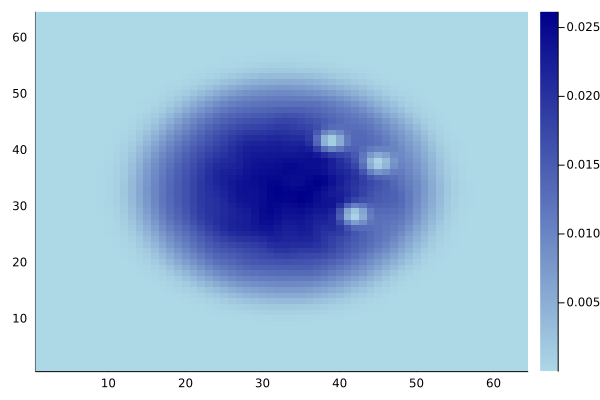

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)